In [62]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline

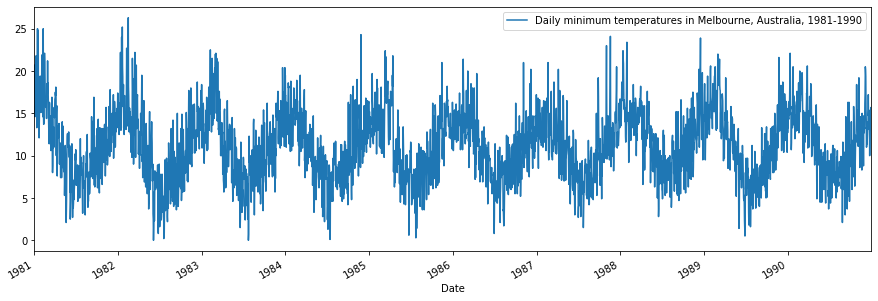

In [5]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv'
df = pd.read_csv(path, parse_dates=['Date'], index_col=['Date'])
df.plot(figsize=(15,5));

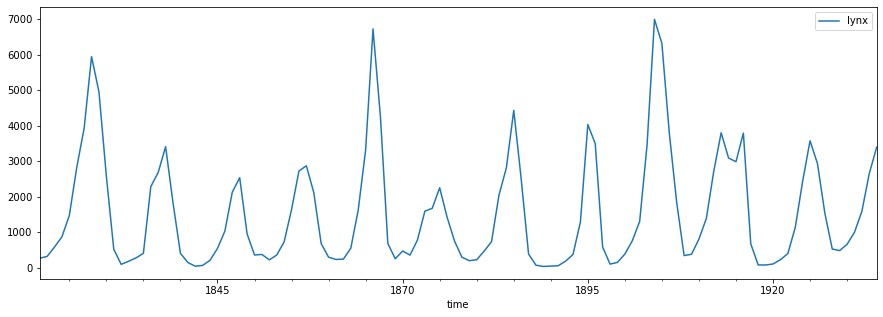

In [8]:
path_1 = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv'
df_1 = pd.read_csv(path_1, parse_dates=['time'], index_col=['time'])
df_1.plot(figsize=(15,5));

In [11]:
path_2 = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'
df_2 = pd.read_csv(path_2)
df_2.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


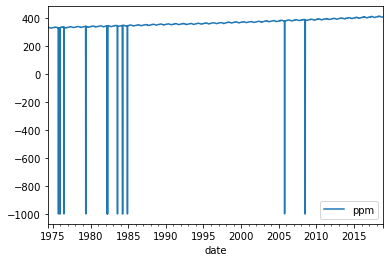

In [21]:
df_2['date'] = df_2.apply(lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day'])), axis=1)
df_2['date'] = pd.to_datetime(df_2['date'])
df_2.index = df_2['date']
df_2[['ppm']].plot();

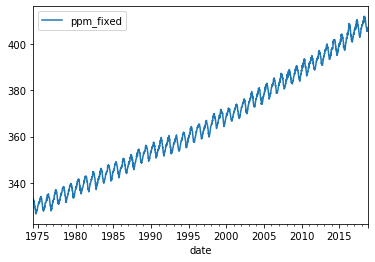

In [24]:
df_2['ppm_fixed'] = df_2['ppm'].map(lambda x: np.nan if x < 0 else x).fillna(method='backfill')
df_2[['ppm_fixed']].plot();

In [25]:
df_2.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date,ppm_fixed
date,,,,,,,,,,,
1974-05-19,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36,1974-05-19,333.34
1974-05-26,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26,332.95
1974-06-02,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57,1974-06-02,332.32
1974-06-09,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63,1974-06-09,332.18
1974-06-16,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07,1974-06-16,332.37


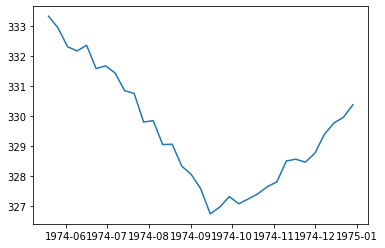

In [28]:
df_1974 = df_2[df_2.year == 1974]

plt.plot(df_1974.index, df_1974.ppm_fixed)

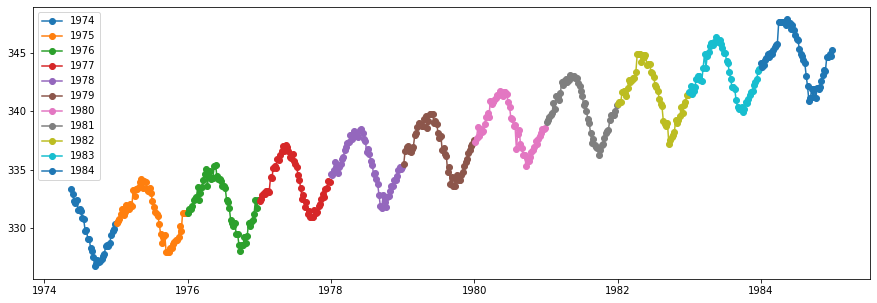

In [31]:
plt.figure(figsize=(15, 5))

for year in range(1974, 1985):
    df_year = df_2[df_2.year == year]
    plt.plot(df_year.index, df_year['ppm_fixed'], 'o-', label=year)
    
plt.legend();

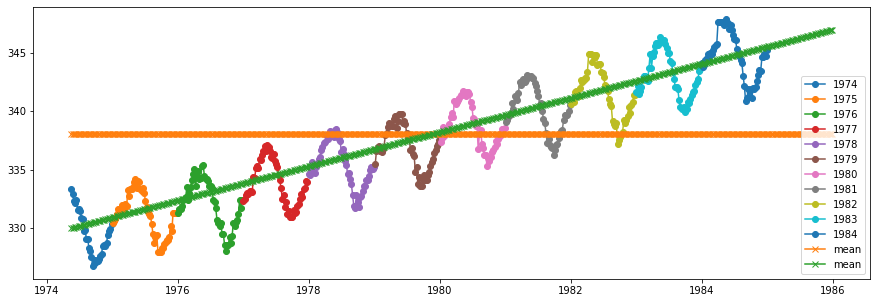

In [79]:
def linear_func(ppm_fixed, k=None, b=0):
    mean_value = np.mean(ppm_fixed)
    if k is None:
        return [mean_value] * len(ppm_fixed)
    
    return [idx*k + b for idx, _ in enumerate(ppm_fixed)]

k = 0.028
b = 330

plt.figure(figsize=(15, 5))
#plt.plot(df_year.index, df_year.ppm_fixed, 'o-', label='original');
for year in range(1974, 1985):
    df_year = df_2[df_2.year == year]
    plt.plot(df_year.index, df_year['ppm_fixed'], 'o-', label=year)

df_year = df_2[(df_2.year <= 1985) & (df_2.year >= 1974)]
    
plt.plot(df_year.index, linear_func(df_year.ppm_fixed), 'x-', label='mean');
plt.plot(df_year.index, linear_func(df_year.ppm_fixed, k, b), 'x-', label='mean');

plt.legend();

In [82]:
print('mean: ', mae(df_year.ppm_fixed, linear_func(df_year.ppm_fixed)))
print('linear: ', mae(df_year.ppm_fixed, linear_func(df_year.ppm_fixed, k, b)))
print('k: ', k, 'b: ', b)

mean:  4.6623136987751375
linear:  1.905133443163097
k:  0.028 b:  330
